In [12]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# Lendo os arquivos CSV usando numpy
route_distances = np.loadtxt("../../data/pemsd7/PeMSD7_W_228.csv", delimiter=",")
speeds_array = np.loadtxt("../../data/pemsd7/PeMSD7_V_228.csv", delimiter=",")

# Exibindo as formas dos arrays carregados
print(f"route_distances shape={route_distances.shape}")
print(f"speeds_array shape={speeds_array.shape}")

route_distances shape=(228, 228)
speeds_array shape=(12672, 228)


- O arquivo `PeMSD7_W_228.csv` contém as distâncias entre 228 estações no Distrito 7 da Califórnia.
- O arquivo `PeMSD7_V_228.csv` contém a velocidade do tráfego coletada para essas estações nos dias úteis de maio e junho de 2012.

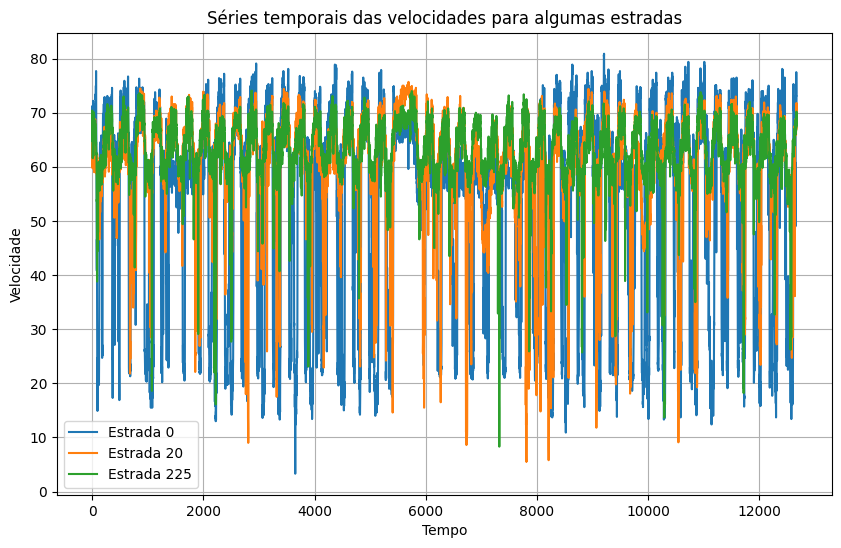

In [25]:
# Selecionar algumas estradas para plotar (por exemplo, estradas 0, 5, 10, 15 e 20)
selected_routes = [0, 20, 225]

# Criar o gráfico das séries temporais das velocidades para as estradas selecionadas
plt.figure(figsize=(10, 6))
for route in selected_routes:
    plt.plot(speeds_array[:, route], label=f'Estrada {route}')

plt.title("Séries temporais das velocidades para algumas estradas")
plt.xlabel("Tempo")
plt.ylabel("Velocidade")
plt.legend()
plt.grid(True)
plt.show()

Para reduzir o tamanho do problema e tornar o treinamento mais rápido, vamos trabalhar apenas com uma amostra de 26 estradas das 228 estradas presentes no conjunto de dados. Escolhemos as estradas começando pela estrada 0, selecionando as 5 estradas mais próximas a ela e continuando esse processo até obtermos 25 estradas. Você pode escolher qualquer outro subconjunto de estradas. Escolhemos as estradas dessa maneira para aumentar a probabilidade de termos estradas com séries temporais de velocidade correlacionadas. sample_routes contém os IDs das estradas selecionadas.

In [26]:
sample_routes = [
    0,
    1,
    4,
    7,
    8,
    11,
    15,
    108,
    109,
    114,
    115,
    118,
    120,
    123,
    124,
    126,
    127,
    129,
    130,
    132,
    133,
    136,
    139,
    144,
    147,
    216,
]
route_distances = route_distances[np.ix_(sample_routes, sample_routes)] 
speeds_array = speeds_array[:, sample_routes]

print(f"route_distances shape={route_distances.shape}")
print(f"speeds_array shape={speeds_array.shape}")

route_distances shape=(26, 26)
speeds_array shape=(12672, 26)


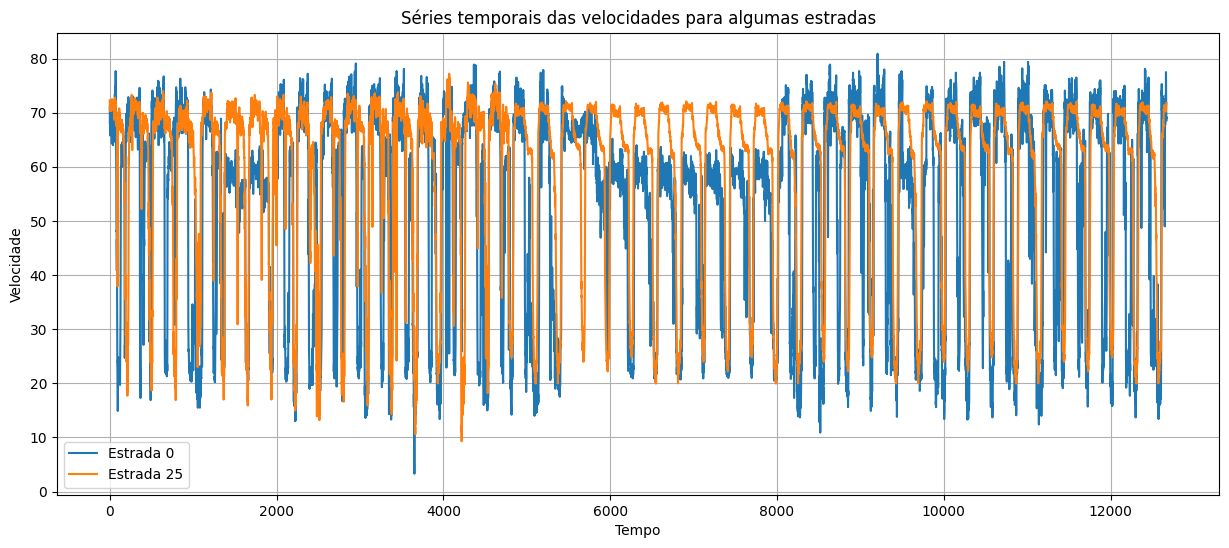

In [37]:
# Selecionar algumas estradas para plotar (por exemplo, estradas 0, 5, 10, 15 e 20)
selected_routes = [0, 25]

# Criar o gráfico das séries temporais das velocidades para as estradas selecionadas
plt.figure(figsize=(15, 6))
for route in selected_routes:
    plt.plot(speeds_array[:, route], label=f'Estrada {route}')

plt.title("Séries temporais das velocidades para algumas estradas")
plt.xlabel("Tempo")
plt.ylabel("Velocidade")
plt.legend()
plt.grid(True)
plt.show()